# **Data Loading**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from the given URL
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", 
                 names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", 
                        "DiabetesPedigreeFunction", "Age", "Outcome"])

# Display dataset information
df.info()
df.isnull().sum()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# **Data Cleaning**

In [2]:

# Replace zeros in critical columns with NaN (since zero values are unrealistic for some measurements)
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_clean] = df[columns_to_clean].replace(0, np.nan)

# Fill missing values using median to reduce the effect of outliers
df.fillna(df.median(numeric_only=True), inplace=True)

# Verify data after cleaning
df.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


# **Univariate Analysis**

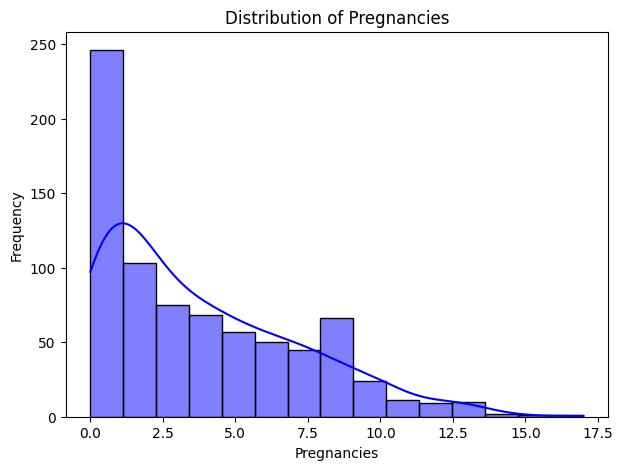

In [3]:

# 1. Distribution of Pregnancies
plt.figure(figsize=(7,5))
sns.histplot(df["Pregnancies"], bins=15, kde=True, color="blue")
plt.xlabel("Pregnancies")
plt.ylabel("Frequency")
plt.title("Distribution of Pregnancies")
plt.show()
    

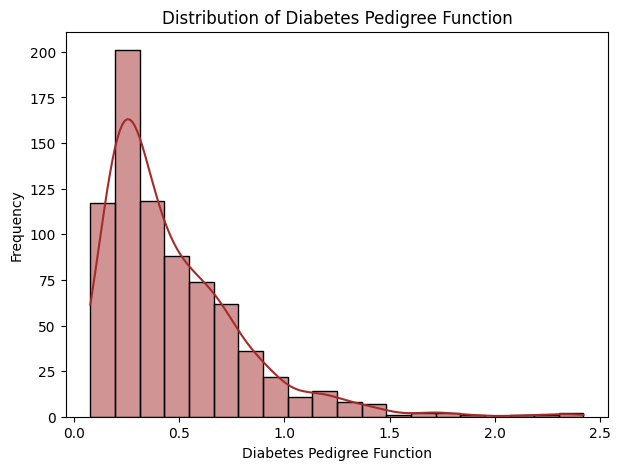

In [4]:

# 2. Distribution of Diabetes Pedigree Function
plt.figure(figsize=(7,5))
sns.histplot(df["DiabetesPedigreeFunction"], bins=20, kde=True, color="brown")
plt.xlabel("Diabetes Pedigree Function")
plt.ylabel("Frequency")
plt.title("Distribution of Diabetes Pedigree Function")
plt.show()
    

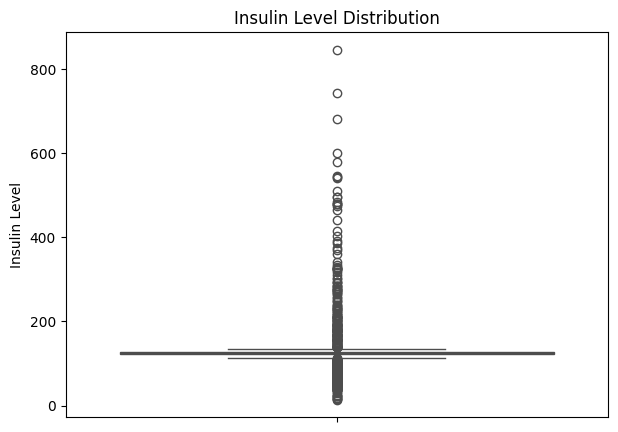

In [5]:

# 3. Boxplot for Insulin Levels
plt.figure(figsize=(7,5))
sns.boxplot(y=df["Insulin"], color="red")
plt.ylabel("Insulin Level")
plt.title("Insulin Level Distribution")
plt.show()
    

# **Bivariate Analysis**

C:\Users\Parth\AppData\Local\Temp\ipykernel_24852\3075217278.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Outcome"], y=df["BloodPressure"], palette="Set2")


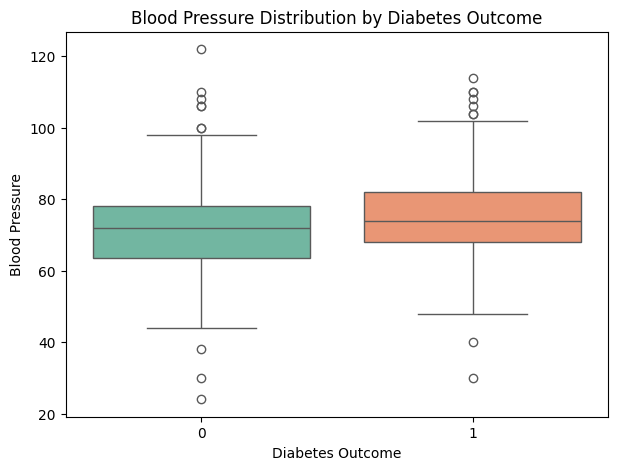

In [6]:

# 1. Blood Pressure vs. Diabetes Outcome
plt.figure(figsize=(7,5))
sns.boxplot(x=df["Outcome"], y=df["BloodPressure"], palette="Set2")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Blood Pressure")
plt.title("Blood Pressure Distribution by Diabetes Outcome")
plt.show()
    

C:\Users\Parth\AppData\Local\Temp\ipykernel_24852\4183024794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Outcome"], y=df["SkinThickness"], palette="Set2")


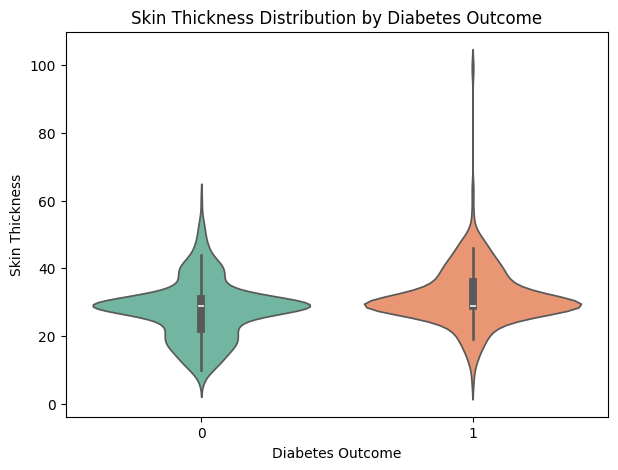

In [7]:

# 2. Skin Thickness vs. Diabetes Outcome
plt.figure(figsize=(7,5))
sns.violinplot(x=df["Outcome"], y=df["SkinThickness"], palette="Set2")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Skin Thickness")
plt.title("Skin Thickness Distribution by Diabetes Outcome")
plt.show()
    

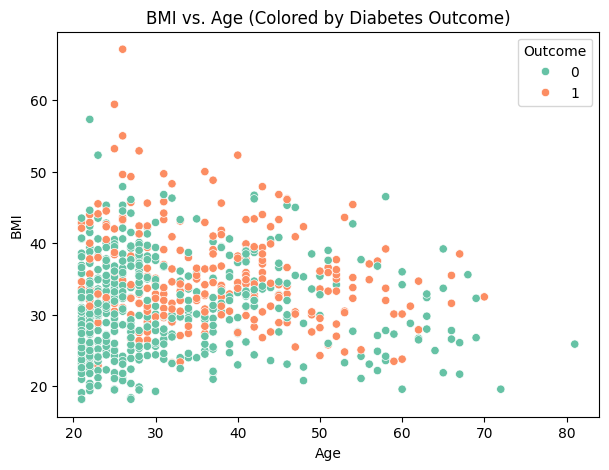

In [8]:

# 3. Scatter Plot: BMI vs. Age (Colored by Diabetes Outcome)
plt.figure(figsize=(7,5))
sns.scatterplot(x=df["Age"], y=df["BMI"], hue=df["Outcome"], palette="Set2")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("BMI vs. Age (Colored by Diabetes Outcome)")
plt.show()
    

# **Multivariate Analysis**

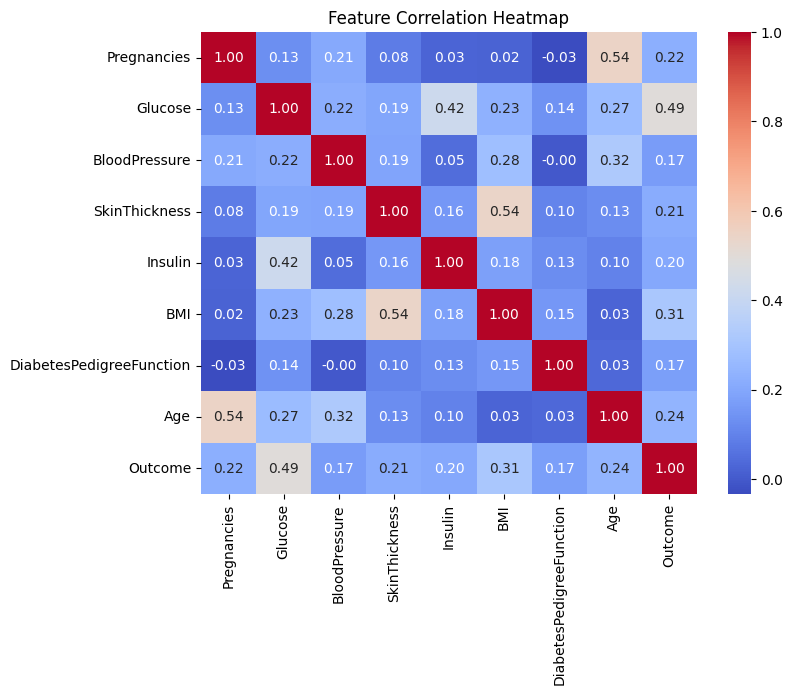

In [9]:

# 1. Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
    

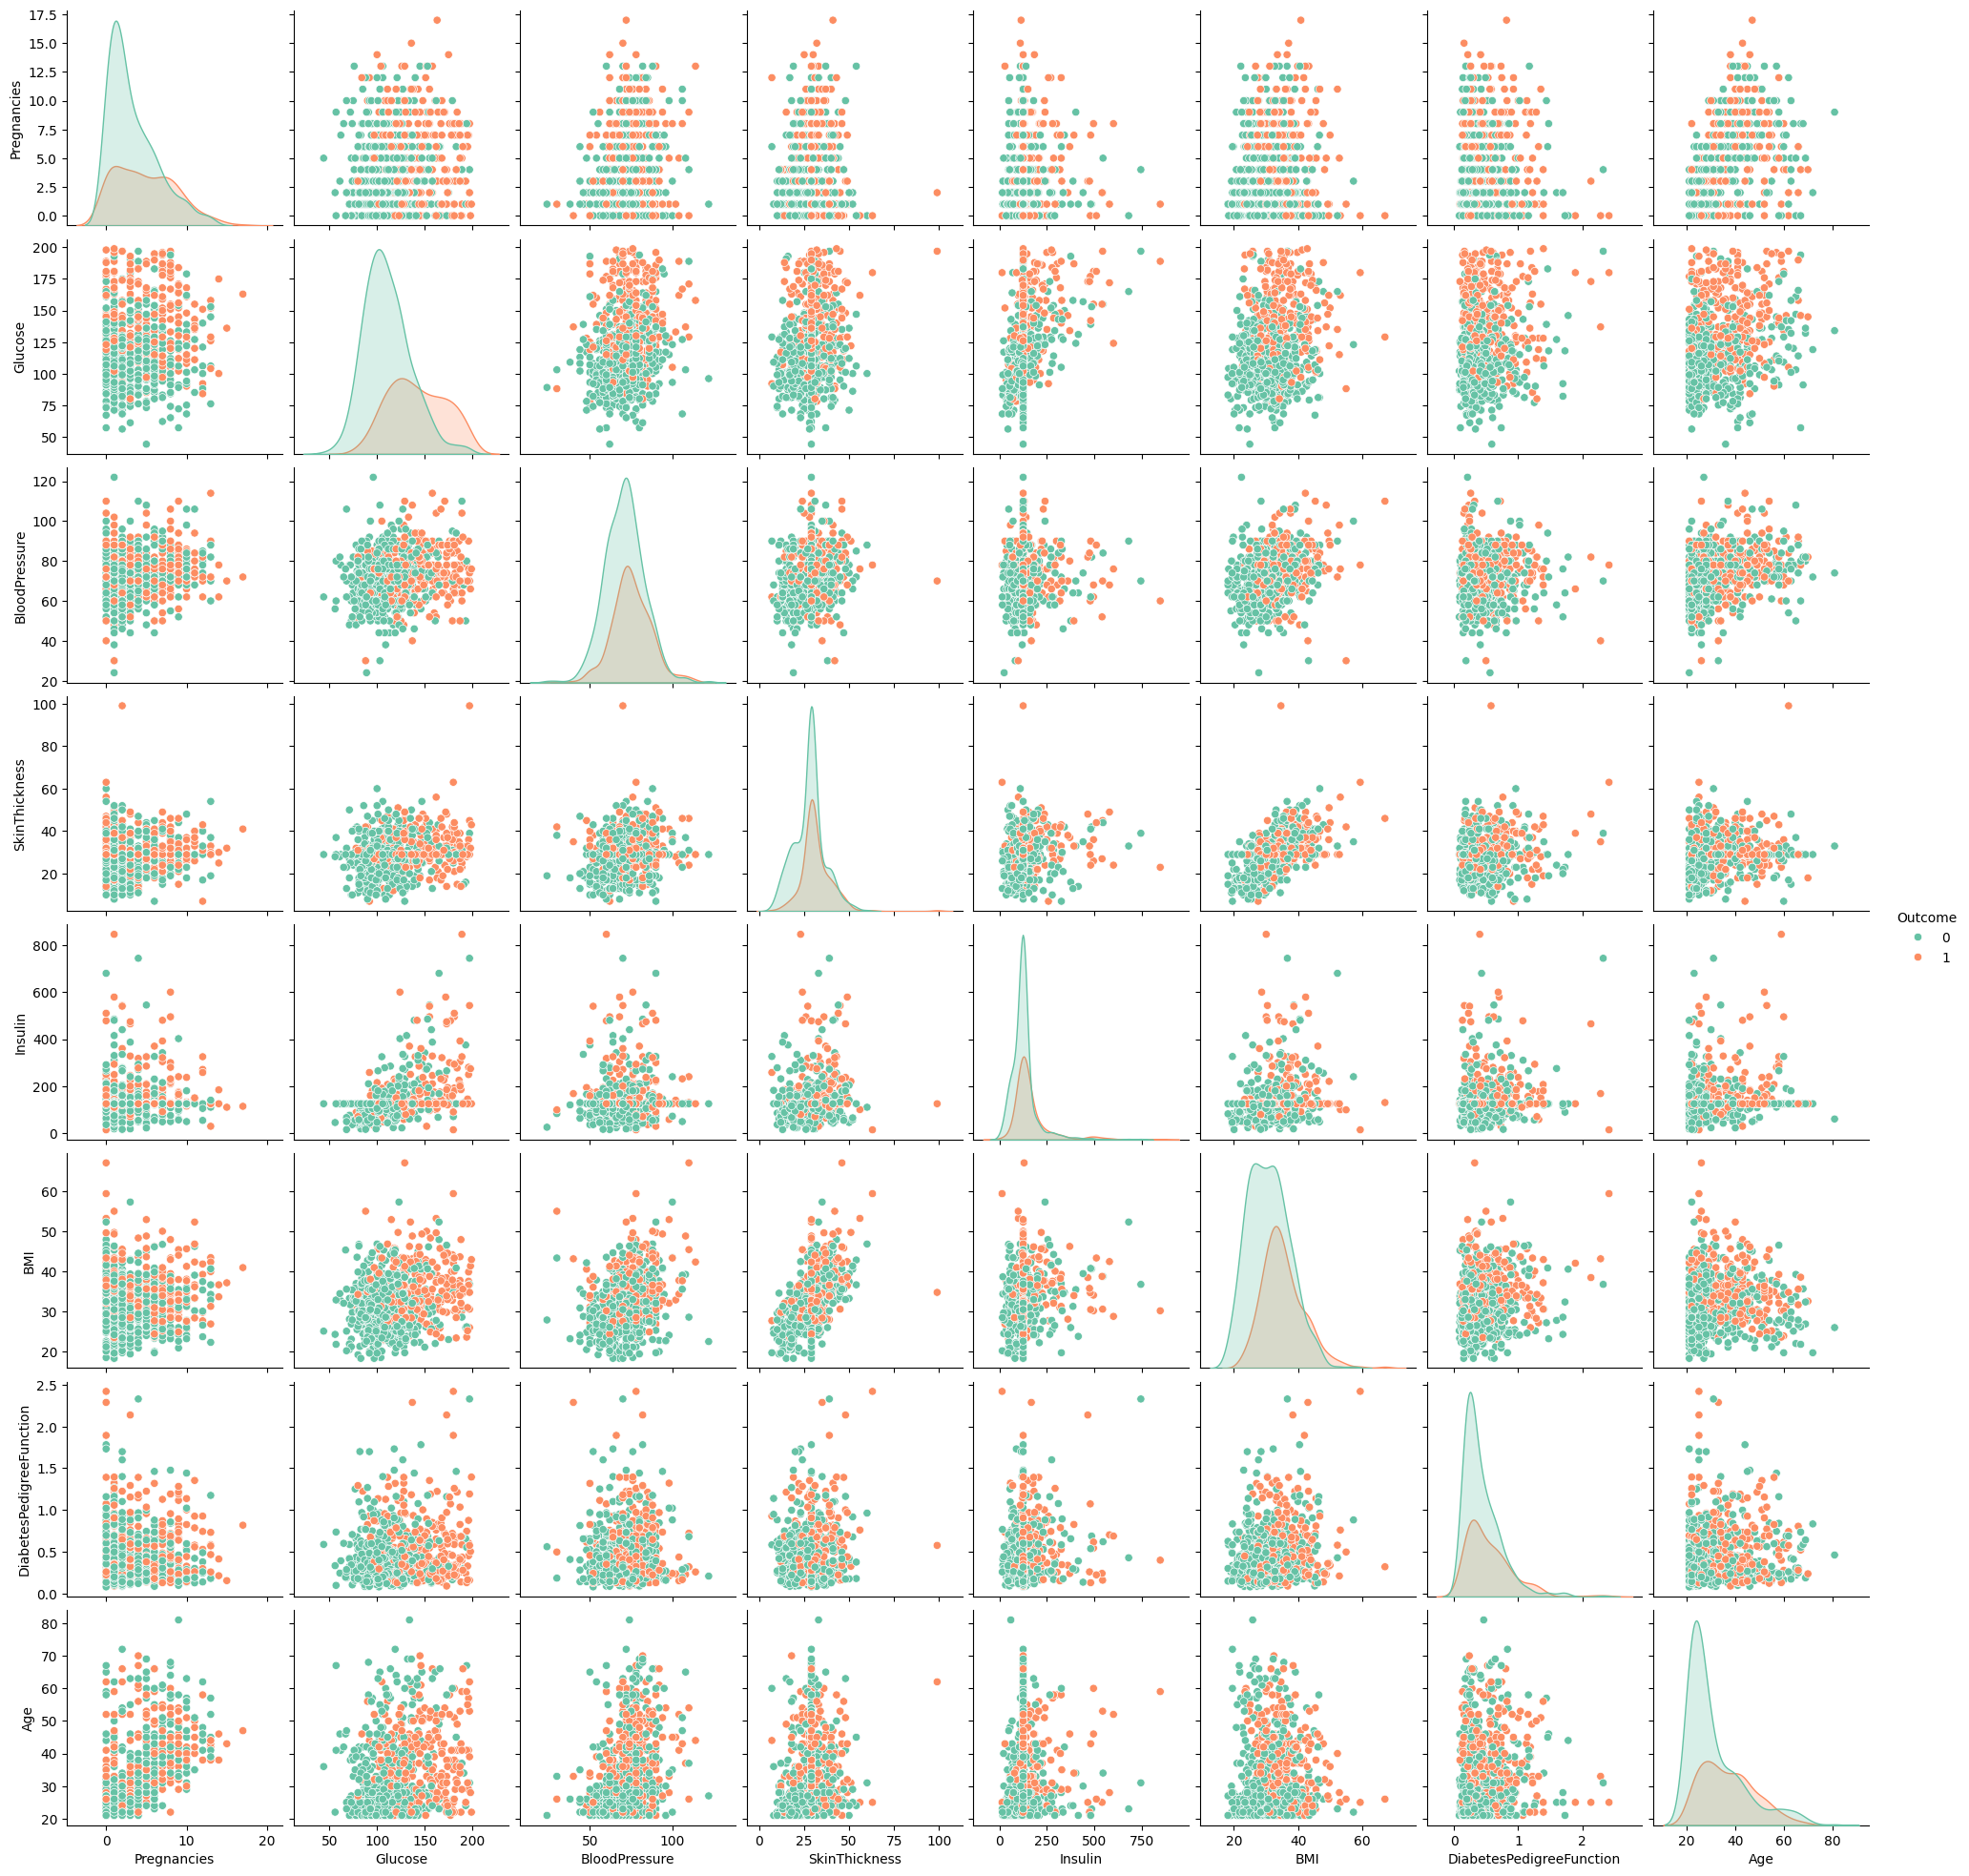

In [10]:

# 2. Pairplot of important features
sns.pairplot(df, hue="Outcome", diag_kind="kde", palette="Set2")
plt.show()
    

# **Additional Insights**

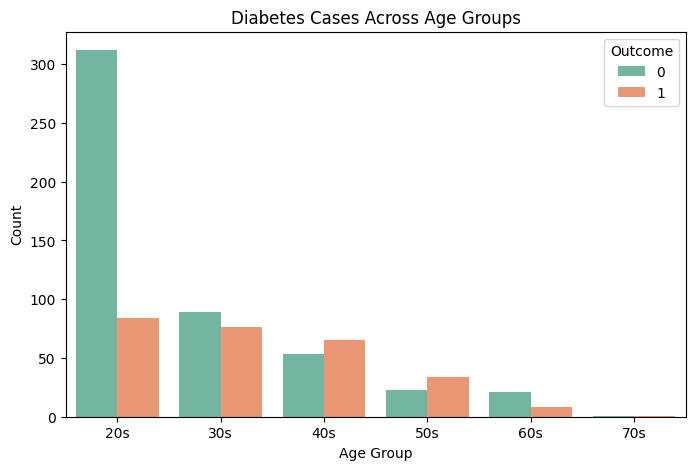

In [11]:

# Creating Age Groups for better visualization
age_bins = [20,30,40,50,60,70,80]
age_labels = ["20s","30s","40s","50s","60s","70s"]
df["AgeGroup"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)

# Count plot of Diabetes Outcome across Age Groups
plt.figure(figsize=(8,5))
sns.countplot(x=df["AgeGroup"], hue=df["Outcome"], palette="Set2")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Diabetes Cases Across Age Groups")
plt.show()
    

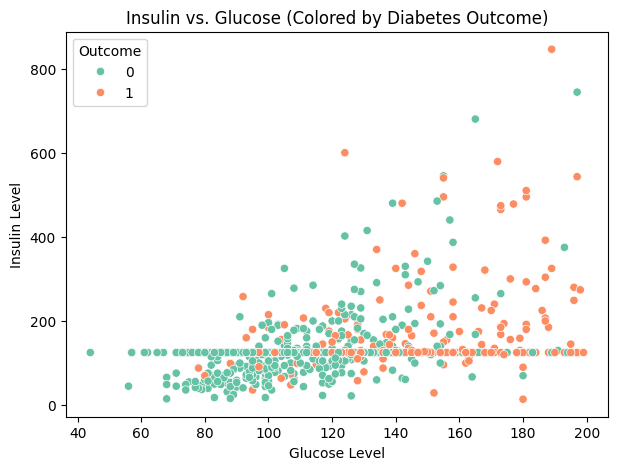

In [12]:

# Scatter Plot: Insulin vs. Glucose (Colored by Diabetes Outcome)
plt.figure(figsize=(7,5))
sns.scatterplot(x=df["Glucose"], y=df["Insulin"], hue=df["Outcome"], palette="Set2")
plt.xlabel("Glucose Level")
plt.ylabel("Insulin Level")
plt.title("Insulin vs. Glucose (Colored by Diabetes Outcome)")
plt.show()
    

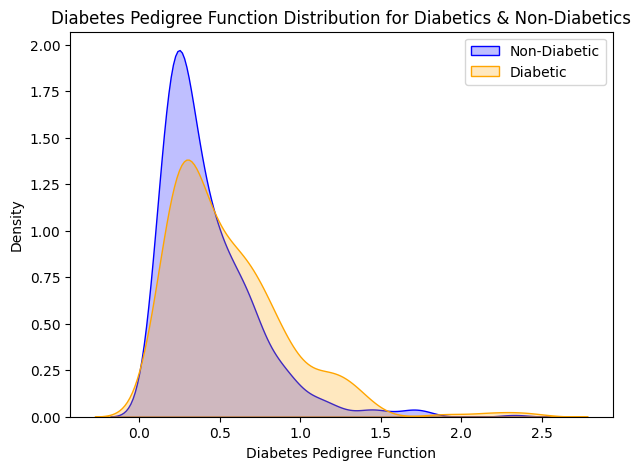

In [13]:

# KDE Plot of Diabetes Pedigree Function for Diabetics vs. Non-Diabetics
plt.figure(figsize=(7,5))
sns.kdeplot(df[df['Outcome'] == 0]['DiabetesPedigreeFunction'], fill=True, color='blue', label='Non-Diabetic')
sns.kdeplot(df[df['Outcome'] == 1]['DiabetesPedigreeFunction'], fill=True, color='orange', label='Diabetic')
plt.xlabel("Diabetes Pedigree Function")
plt.ylabel("Density")
plt.title("Diabetes Pedigree Function Distribution for Diabetics & Non-Diabetics")
plt.legend()
plt.show()
    

# **Expanded Visualizations**

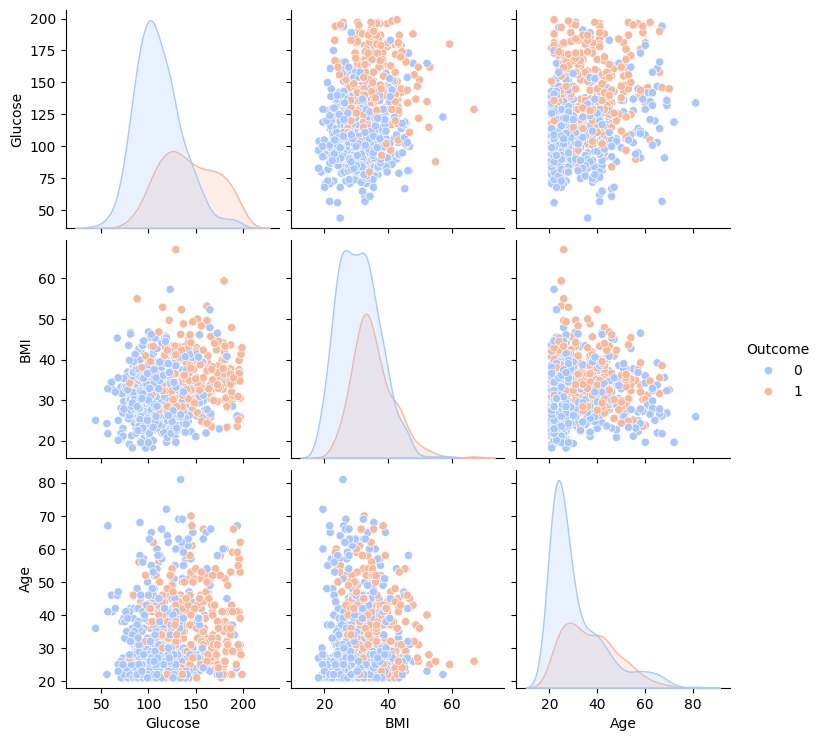

In [14]:

# Pairwise Scatter Plot between Glucose, BMI, and Age
sns.pairplot(df, vars=['Glucose', 'BMI', 'Age'], hue='Outcome', palette='coolwarm')
plt.show()
    

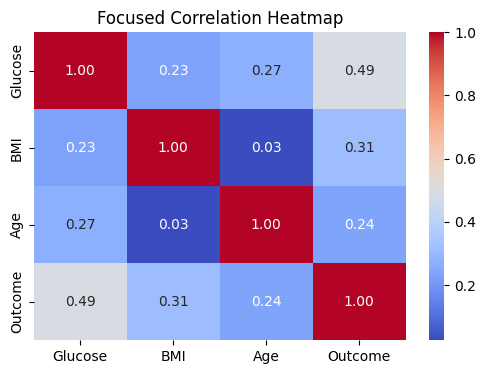

In [15]:

# Heatmap focusing only on highly correlated variables
plt.figure(figsize=(6,4))
sns.heatmap(df[['Glucose', 'BMI', 'Age', 'Outcome']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Focused Correlation Heatmap")
plt.show()
    

C:\Users\Parth\AppData\Local\Temp\ipykernel_24852\2297732105.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Outcome"], y=df["Age"], palette="coolwarm")


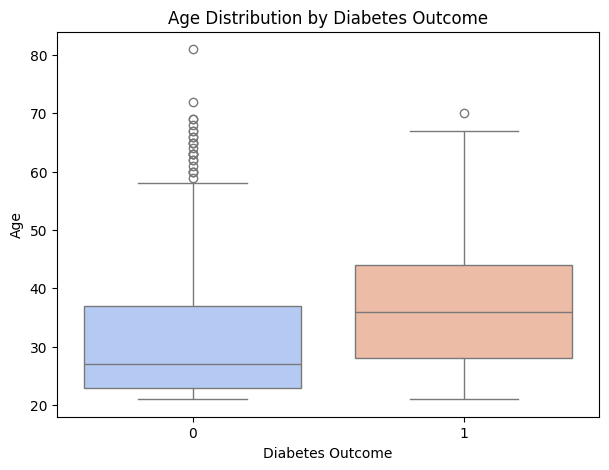

In [16]:

# Boxplot for Age vs. Outcome
plt.figure(figsize=(7,5))
sns.boxplot(x=df["Outcome"], y=df["Age"], palette="coolwarm")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Age")
plt.title("Age Distribution by Diabetes Outcome")
plt.show()
    

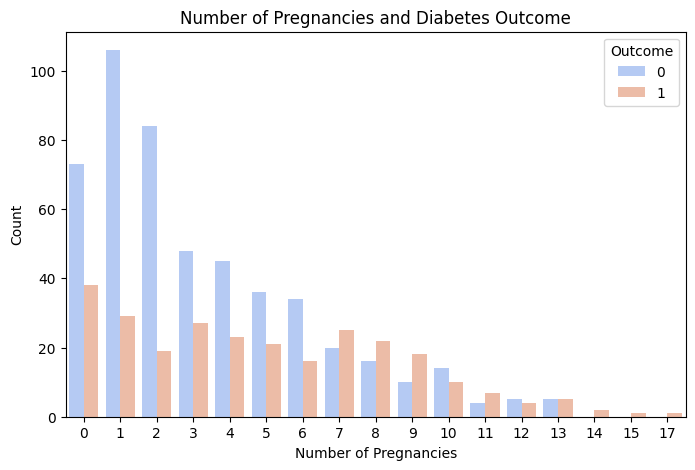

In [17]:

# Countplot for Number of Pregnancies vs. Diabetes Outcome
plt.figure(figsize=(8,5))
sns.countplot(x=df["Pregnancies"], hue=df["Outcome"], palette="coolwarm")
plt.xlabel("Number of Pregnancies")
plt.ylabel("Count")
plt.title("Number of Pregnancies and Diabetes Outcome")
plt.show()
    

# **Conclusion**

In [18]:

print("\nAnalysis Complete. Use the visualizations to interpret feature importance and trends.")
    


Analysis Complete. Use the visualizations to interpret feature importance and trends.
